In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import math
import numpy as np
%matplotlib inline

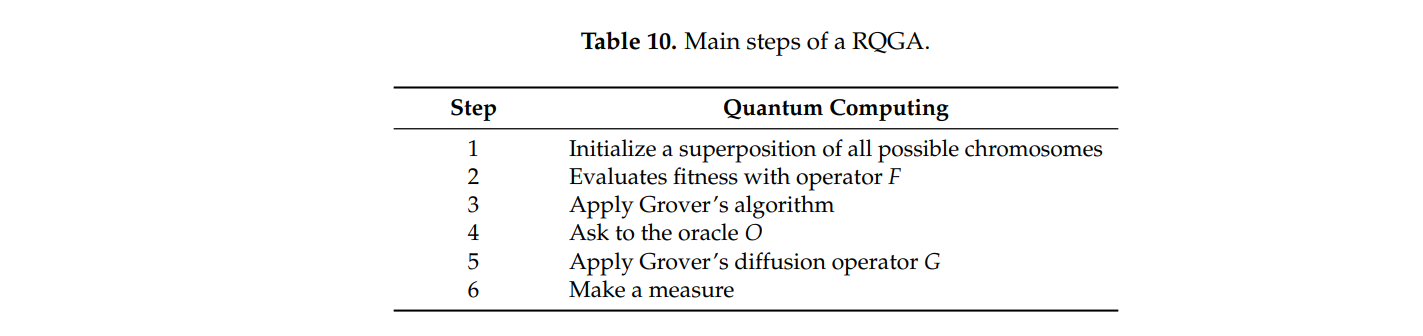

# Step1 
### Initialize a superposition of all possible chromosomes

[0.97576923 0.58408783 1.36733896 0.82551891]


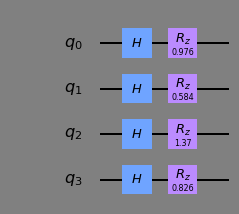

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

n = 4

#Init population
circuit = QuantumCircuit(n)#,2)
circuit.h(range(n))
rand_theta = np.random.uniform(0, np.pi/2, 4)
print(rand_theta)
for i in range(n):
    circuit.rz(rand_theta[i], i)

circuit.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

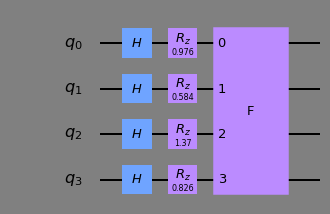

In [3]:
from qiskit.quantum_info.operators import Operator
################################# fitness function oracle for the problem mensioned below #####################
 #########################################################
 #                                                       #
 # Problem: optimize a function f(x)=abs(x-5/2+sin(x))   #          
 # values in the range 0<=x<=15. Within this range f(x)  #
 # has a maximum value at x=11 (binary is equal to 1011) #                   
 #########################################################
###############################################################################################################
f = [
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
]
circuit.unitary(f,range(n), label='F')
circuit.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})


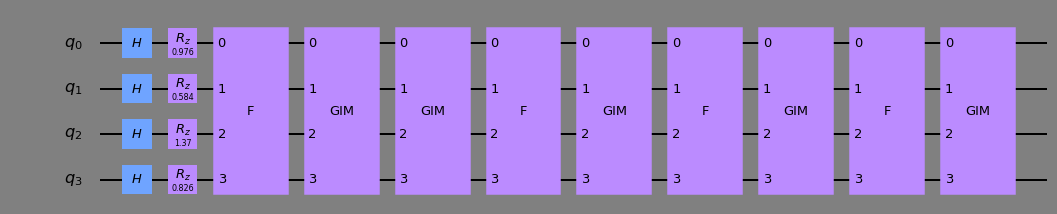

In [5]:
#Gr_Inv_Mat
def ia(n):
    ia_mat=2*np.ones(2**n)/(2**n)
    ia_mat=ia_mat-np.identity(2**n)
    return ia_mat
GIM = ia(n)
circuit.unitary(GIM,range(n), label='GIM')


#GN 
gn = int((np.pi/4)*(np.sqrt(2**n)))
#print(gn)
for i in range(gn):
    circuit.unitary(f,range(n), label='F')
    circuit.unitary(GIM,range(n), label='GIM')
#circuit.measure(range(2),range(2))
circuit.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

In [6]:
circuit.measure_all()

Counter({'1011': 34, '0000': 13, '0010': 9, '1111': 9, '0001': 8, '0111': 7, '1000': 5, '1101': 3, '1010': 3, '0100': 3, '0101': 3, '1110': 2, '0011': 1})


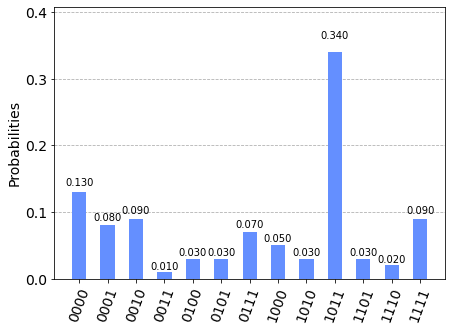

In [7]:
#backend
from collections import Counter

sim = Aer.get_backend('qasm_simulator')
result = Counter(execute(circuit,backend=sim,shots=100).result().get_counts())
print(result)
#creating histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(result)

In [15]:
def bin2dec(string_num):
    return int(string_num, 2)

In [9]:
bin2dec(result.most_common()[0][0])

11

# Problem 2

[0.75031461 1.27575166 0.75394638 0.61698491]


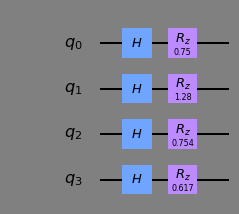

In [70]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

n = 4

#Init population
circuit = QuantumCircuit(n)#,2)
circuit.h(range(n))
rand_theta = np.random.uniform(0, np.pi/2, 4)
print(rand_theta)
for i in range(n):
    circuit.rz(rand_theta[i], i)

circuit.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

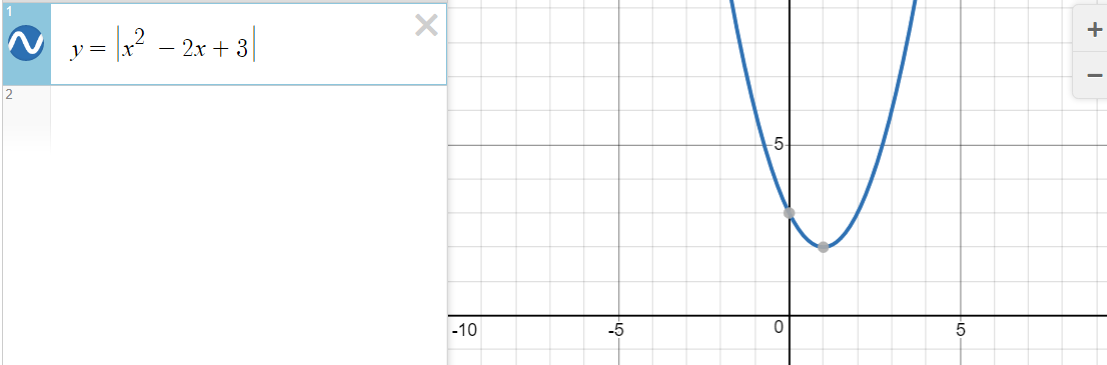

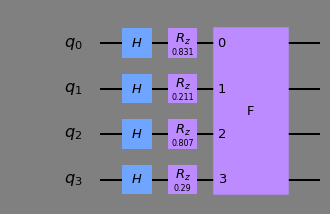

In [43]:
from qiskit.quantum_info.operators import Operator
################################# fitness function oracle for the problem mensioned below #####################
 #########################################################
 #                                                       #
 # Problem: optimize a function f(x)= x^2 -2x +3  #          
 # values in the range 0<=x<=15. Within this range f(x)  #
 # has a maximum value at x=1 (binary is equal to 0001) #                   
 #########################################################

f = [
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
]
circuit.unitary(f,range(n), label='F')
circuit.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})


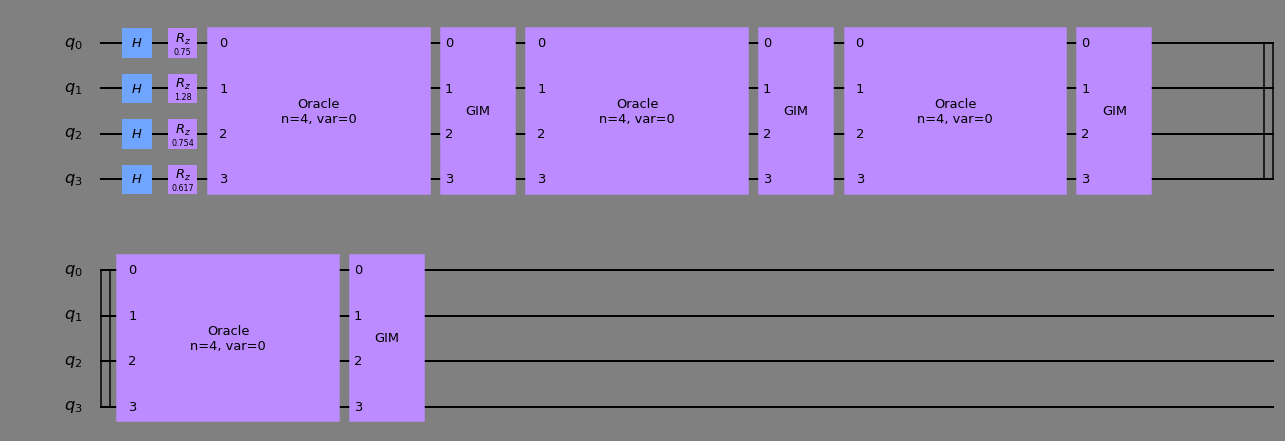

In [72]:
#Gr_Inv_Mat
def ia(n):
    ia_mat=2*np.ones(2**n)/(2**n)
    ia_mat=ia_mat-np.identity(2**n)
    return ia_mat
GIM = ia(n)
circuit.unitary(GIM,range(n), label='GIM')


#GN 
gn = int((np.pi/4)*(np.sqrt(2**n)))
#print(gn)
for i in range(gn):
    circuit.unitary(f,range(n), label='F')
    circuit.unitary(GIM,range(n), label='GIM')
circuit.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

In [73]:

circuit.measure_all()

Counter({'1101': 2232, '0000': 1685, '1111': 1520, '1000': 847, '0111': 724, '0001': 664, '0100': 643, '1110': 555, '1011': 533, '0010': 153, '1100': 113, '1001': 113, '0110': 73, '0011': 64, '0101': 57, '1010': 24})


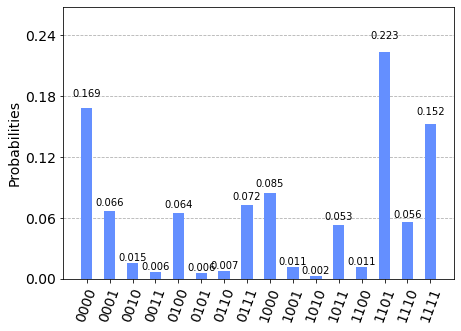

In [74]:
#backend
from collections import Counter

sim = Aer.get_backend('qasm_simulator')
result = Counter(execute(circuit,backend=sim,shots=10000).result().get_counts())
print(result)
#creating histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(result)

In [75]:
bin2dec(result.most_common()[0][0])

13

In [ ]:
from qiskit_textbook.problems import grover_problem_oracle
## Example Usage
n = 4
oracle = grover_problem_oracle(n, variant=1)  # 0th variant of oracle, with n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()